In [11]:
import numpy as np
import matplotlib.pyplot as plt

def normalize(img):
  min_ = np.min(img)
  if min_ < 0:
    img += -min_
  else:
    img -= min_
  max_ = np.max(img)
  img /= max_
  
  for k in range(img.shape[0]):
    for d in range(img.shape[1]):
      assert 0 <= img[k, d] <= 1
  return img

In [12]:
unfair_path = "./weights_trained_data__adult__model_class_WeightedDemParWassGan__model_fair_coeff_0_0_table.npz"
fair_path_0_5 = "./weights_trained_data__adult__model_class_WeightedDemParWassGan__model_fair_coeff_0_5_table.npz"
fair_path_1_0 = "./weights_trained_data__adult__model_class_WeightedDemParWassGan__model_fair_coeff_1_0_table.npz"
fair_path_1_5 = "./weights_trained_data__adult__model_class_WeightedDemParWassGan__model_fair_coeff_1_5_table.npz"


In [38]:
curr_path = fair_path_1_5
save=True
weights_trained = normalize(np.load(curr_path)['data'])

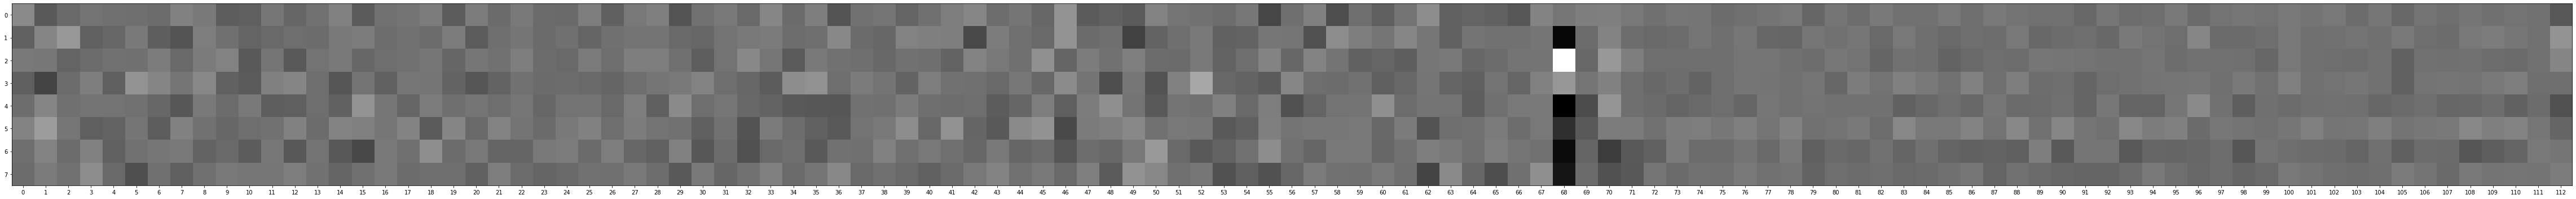

In [39]:
plt.figure(figsize=(80, 5))
plt.imshow(weights_trained.T, cmap='gray')
ax = plt.gca()
ax.set_xticks(np.arange(0, 113, 1))
plt.tight_layout()
if save:
  plt.savefig(f'weights_viz_{curr_path[-15:-4]}')


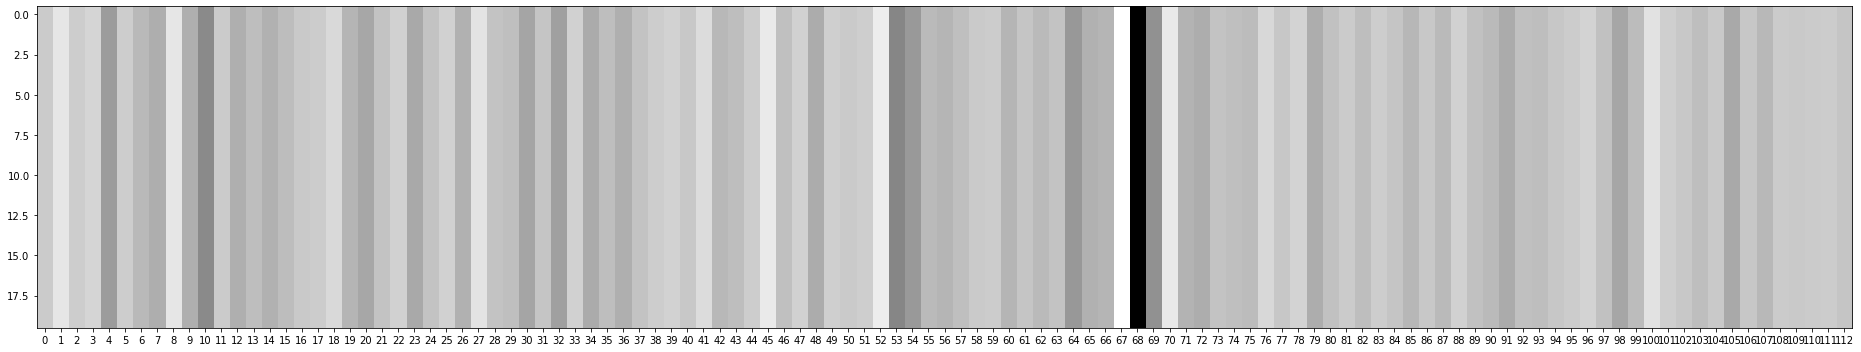

In [40]:
weights_trained_summed = weights_trained.sum(axis=1)
weights_trained_summed = weights_trained_summed.reshape((113, 1))
weights_trained_summed_viz = np.tile(weights_trained_summed, (1, 20))
plt.figure(figsize=(80, 5))
plt.imshow(weights_trained_summed_viz.T, cmap='gray')
ax = plt.gca()
ax.set_xticks(np.arange(0, 113, 1))
plt.tight_layout()
if save:
  plt.savefig(f'weights_viz_summed_{curr_path[-15:-4]}')

In [41]:
# Compare summed weights of gender vs. occupation
weights_trained_arr = weights_trained_summed.squeeze(-1)
print(weights_trained_arr.shape)

m_weight = weights_trained_arr[69]
f_weight = weights_trained_arr[68]

occ_weights = weights_trained_arr[43:57]

m_count, f_count = 0, 0
for w in occ_weights:
  if w <= m_weight:
    m_count += 1
  if w <= f_weight:
    f_count += 1
    
print(m_count / 14)
print(f_count / 14)

(113,)
0.07142857142857142
0.0
